# Abstract

# Introduction 

# Data

## Franke Function and Terrain Data
We will revisit these datasets from project one. For further description refer to the report for project 1 [1]

## MNIST Handwritten Numbers
For our classification problem we will be using the MNIST database of handwritten numbers, or more specifically a subset of this available as the digits dataset in scikit-learn[2]. 

This dataset contains pixel images of handwritten numbers. In total the digits dataset contains 1797 8x8 images. Meaning we have a dataset consisting of 1797 data points, each with 64 descriptors or inputs, and one output, the label. 

We can import this dataset and look at one of the datapoints.

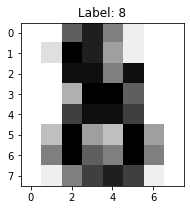

Figure 1: Plot of one of the entries in the digits dataset showing a number 8.


In [39]:
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the data
digits = datasets.load_digits()

# Plot a datapoint; the first number in the set
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("Label: %d" % digits.target[-1])
plt.show()
print("Figure 1: Plot of one of the entries in the digits dataset showing a number 8.")

We will use this dataset to fit and test our classification models. Before we can do this we need to split the data into a training set and a test set.

In [36]:
from sklearn.model_selection import train_test_split

# Setting the predictors/inputs and the target
digit_input = digits.images
digit_target = digits.target

# Splitting into training and test
train_size = 0.8
X_train, X_test, Y_train, Y_test = train_test_split(digit_input, digit_target, stratify=digit_target,
                                                    train_size=train_size)

I want to make sure that the different classes, i.e. the labels are similarly distributed among the test set and the training test. If for instance no occurrences of the label '3' is found in the training set, models trained on this set are expected to perform poorly on identifying such digits in the test set. That is why I have set the $\texttt{stratify}$ parameter in $\texttt{train_test_split()}$ above. Let us see if it did its job.

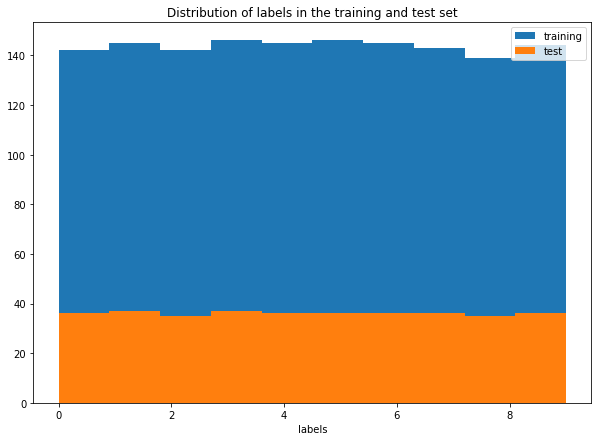

Figure 2: Histogram of label distribution in training and test set.


In [38]:
# Creating histogram 
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(Y_train, label='training')
ax.hist(Y_test, label='test')
plt.legend() 
plt.xlabel("labels") 
plt.title("Distribution of labels in the training and test set")
  
# Show plot 
plt.show() 
print("Figure 2: Histogram of label distribution in training and test set.")

We see that the labels seem to be very evenly distributed.

# Methods
For descriptions of ordinary least squares and ridge regression, please refer to my report for project 1[1].
## Performance Measures
For a description of the mean square error and $r^2$ please again consult the report of project 1[1].

### Accuracy
We use the accuracy score to measure the performance of our classification methods. This measure is given by the number of correctly guessed targets $t_i$ divided by the total number of targets, that is

$$
\text{Accuracy} = \frac{\sum_{i=1}^n I(t_i = y_i)}{n} ,
$$

where $I$ is the indicator function, which takes the value $1$ if $t_i = y_i$ and $0$ otherwise (for a binary classification problem). Here $t_i$ represents the target and $y_i$ is the prediction. The number of targets is given by $n$.

## Regression Methods

## Logistic Regression


It is called Logistic Regression because it used the logistic function which is basically a sigmoid function. A sigmoid function takes in a value and produces a value between 0 and 1

Logistic regression is generally applied to (binary) classification problems. Logistic regression assumes the binomial distribution of the dependent variable. It applies a logistic function to model a binary dependent variable. Logistic regression on a binary outcome is often called binary logistic regression, and can be expended to multiple predictors. This is called multinomal logistic regression. 

Unlike linear regression, where the outputs take continuous values, we are now interested in discrete outputs, either binary 0/1 or more. To transform the continuous to discrete output we can use a so-called activation function. Several such functions can be used; the step function, the sigmoid, tanhh etc. 

For the sigmoid function we get

$$
\hat{y}_k = g(\beta^T X_k),\ g(z) = \frac{1}{1+\exp(-z)}
$$
where $g(z)$ is the sigmoid.

While we in linear regression used the mean square error as the cost function, this cost function will we non-convex for the logistic case. Therefore a different cost function is used, which we use maximum likelihood estimation to find. The result is the cross-entropy. The cross-entropy is a convex function of the weights $\hat{\beta}$.

$$
\mathcal{C}(\hat{\beta})=-\sum_{i=1}^n  \left(y_i(\beta_0+\beta_1x_i) -\log{(1+\exp{(\beta_0+\beta_1x_i)})}\right).
$$

To minimize this function we find the derivatives, written compactly as 

$$
\frac{\partial \mathcal{C}(\hat{\beta})}{\partial \hat{\beta}} = -\hat{X}^T\left(\hat{y}-\hat{p}\right).
$$

where $\hat{p}$ is a vector of fitted probabilities $p(y_i\vert x_i,\hat{\beta})$, and

$$
\frac{\partial^2 \mathcal{C}(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}\partial \boldsymbol{\beta}^T} = \boldsymbol{X}^T\boldsymbol{W}\boldsymbol{X}.
$$

where $\boldsymbol{W}$ is a diagonal matrix  with elements $p(y_i\vert x_i,\boldsymbol{\beta})(1-p(y_i\vert x_i,\boldsymbol{\beta})$.

Solving these can be done with for instance Newton-Raphson's iterative method or a gradient descent method.
[//]: # (Add multinomial logistic regression including softmax)

### Regularization
We will be adding an $L_2$ regularization parameter $\lambda$ to our logistic regression. See description of ridge regression in project 1[1] for more info on $L_2$ regularization.

## Stochastic Gradient Descent

Stochastic Gradient Descent (SGD) is a variation of the gradient descent method. There are many different variations of gradient descent but the common denomiator is that they work to find the minima of a function (typically the cost function) by iteratively moving in the direction of steepest descent.

In other words, if we want to find the minimum of a function $F(\mathbf{x})$, we should move in the
direction of the negative gradient $-\nabla F(\mathbf{x})$.

For a (typically small) stepsize $\gamma_k > 0$ known as the step size, or learning rate we then have 

$$
\mathbf{x}_{k+1} = \mathbf{x}_k - \gamma_k \nabla F(\mathbf{x}_k),
$$

An initial guess is made for $\mathbf{0}_k$.

For a convex cost function and a sufficiently small stepsize $\gamma_k$ this method can be used to find the global minimum of said cost function.

One drawback of this method is that computing the gradient for large datasets can be very computationally expensive. This is where SGD and its variations comes in. Instead of calculating the gradiant for all datapoints, SGD chooses a subset of the data to calculate the gradient on. The method divides the dataset into a set of $n/M$ so-called mini-batches, and for each step the gradient is calculated on one of these mini-batches. These minibatches are denoted by $B_k$ where $k=1,\cdots,n/M$.

Rewriting the gradient descent method in terms of a cost function $C(\mathbf{\beta})$, we get

$$
\mathbf{\beta}_{k+1} = \mathbf{\beta}_k - \gamma_k \nabla_{\beta} C(\mathbf{x}_k,\mathbf{\beta}_k),
$$

Taking the gradient with respect to one mini-batch per step we get

$$
\beta_{k+1} = \beta_k - \gamma_k \sum_{i \in B_k}^n \nabla_\beta c_i(\mathbf{x}_i,
\mathbf{\beta}_k)
$$

which is the stochastic gradient descent method.

In linear regression the cost function is the mean square error. For the gradient of the cost function we then have

$$
\nabla_{\beta} C(\mathbf{\beta}) = \frac{2}{n} \bigg( X^T (X\beta-y) + \lambda \beta \bigg)
$$

here I have added an $L_2$ regularization parameter $\lambda$ which will be zero for ordinary least squares, but take some non-zero value for ridge. The number of datapoints is given by n. 

For logistic regression the cost function is the cross-entropy.


[//]: # (Add momentum? Momentum based GD: http://localhost:8888/notebooks/Documents/Studier/fys-stk3155/Exercises/MachineLearning/doc/pub/Splines/ipynb/Splines.ipynb)


## Neural Network
Neural networks are a group of models originally inspired by biological neuron used in supervised and unsupervised learning as well as specialized tasks such as image processing. They are non-linear models and can be considered powerful extensions of supervised learning methods like linear and logistic regression  We will be focusing on a type of neuroal networks called feed-forward neural networks (FFNN). 

### Feed-Forward Neural Network
A FFNN is a type of artifical neural network (ANN) made up of layers of connected neurons, also called nodes. They consist of an input layer, followed by one or more so-called hidden layers, and finally an output layer. In each layer there is a certain number of nodes, and this number can vary between the layers. The nodes of one layer are connected with the nodes of the next with an associated weight variable. In addition there may be a bias in each layer. Training the model amounts to finding optimal values for these weights and biases.

In FFNN the information flows only forward, from one layer to the next. If all nodes in each layer are connected to all the nodes in the next we have a fully connected network. According to the *Universal approximation theorem*[4], a FFNN with just a single hidden layer containing a finite number of neurons can approximate a continuous multidimensional function to arbitrary accuracy. This result assumes that the activation function for the hidden layer is a non-constant, bounded and monotonically-increasing continuous function.[5] 

For a fully-connected model each input node sends its input $x_j$ to every node in the first hidden layer. The input to node $i$ of the first hidden layer becomes:

$$
\begin{equation} z_i^1 = \sum_{j=1}^{M} w_{ij}^1 x_j + b_i^1
\end{equation}
$$

Each input is weighted bu $w_{ij}$ and in addition to the sum over the weighted inputs the node receives a bias contribution $b_i^1$. This bias is to assure we don't end up with zero activation in a layer, as this would stop the flow of information from the input to the output, and give us no output. The ouput from node $i$ in the first hidden layer is 

$$
\begin{equation}
 y_i^1 = f(z_i^1) = f\left(\sum_{j=1}^M w_{ij}^1 x_j  + b_i^1\right)
\end{equation}
$$

where $f(z)$ is the activation function for the hidden layer. The output from the nodes in the hidden layer are given as weighted inputs to all the nodes in the next hidden layer in the same way as described here for this first layer, with a (different or equal) activation function giving the ouput of that next layer. This continues until the output layer. The output from this final layer is the model layer. Typically the nodes in the hidden layers all have the same activation function, while the ouput layer has a different one.

Generalizing we get the output from a model with $l$ hidden layers as:

$$
\begin{equation}
y^{l+1}_i = f^{l+1}\left[\!\sum_{j=1}^{N_l} w_{ij}^3 f^l\left(\sum_{k=1}^{N_{l-1}}w_{jk}^{l-1}\left(\dots f^1\left(\sum_{n=1}^{N_0} w_{mn}^1 x_n+ b_m^1\right)\dots\right)+b_k^2\right)+b_1^3\right] 
\end{equation}
$$

which is a nested sum of weighted activation functions.

With the biases and activations as $N_l \times 1$ column vectors $\hat{b}_l$ and $\hat{y}_l$, where the $i$-th element of each vector is the bias $b_i^l$ and activation $y_i^l$ of node $i$ in layer $l$ respectively, and the weights as an $N_{l-1} \times N_l$ matrix, $\mathrm{W}_l$ we can write the sum as a matrix-vector multiplication. Looking at hidden layer 2 for simplicity we can write this in matrix notation as 

$$
\begin{equation}
 \hat{y}_2 =  
 f_2\left(\left[\begin{array}{cccc}
    w^2_{11} &w^2_{12}  &\cdots &w^2_{1N_l} \\
    w^2_{21} &w^2_{22} &\cdots &\vdots \\
    \vdots   &\vdots   &       &\vdots \\
    w^2_{N_{l-1}1} &w^2_{N_{l-1}2} &\cdots &w^2_{N_{l-1}N_l} \\
    \end{array} \right] \cdot
    \left[\begin{array}{c}
           y^1_1 \\
           y^1_2 \\
           \vdots \\
           y^1_{N_l} \\
          \end{array}\right] + 
    \left[\begin{array}{c}
           b^2_1 \\
           b^2_2 \\
           \vdots \\
           b^2_{N_l} \\
          \end{array}\right]\right)
\end{equation}
$$

### Activation Function
A choice must be made for the activation function to be usen in the nodes of the hidden layer as well as the nodes of the ouput layer.

Typical choices include the one-sided *sigmoid* function

$$
f(x) = \frac{1}{1 + e^{-x}},
$$
which is considered more biologically plausible because the output of inactive neurons are zero.


and the *hyperbolic tangent* function

$$
f(x) = \tanh(x)
$$

A generalization of the logistic function often used in multinomial logistic regression is the *softmax* function[6]

$$
f(x) = \frac{e^x}{\sum_{j=1}^K e^{x}},
$$

which vector of $K$ real numbers as inputs, and normalizes it into a probability distribution consisting of $K$ probabilities proportional to the exponentials of the input numbers. 

# Results and Discussion

## Linear Regression with Gradient Descent

In project one we looked modeled the Franke function using ordinary least squares (OLS) and ridge regression. Now we want to modify these methods to use stochastic gradient descent to obtain the fit, i.e the $\beta$. 

First we create some data from the Franke function, divide into training and test sets, and scale it.

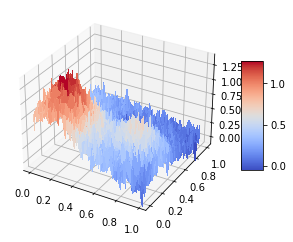

Figure 2: 3D plot of the Franke function with added noise.


In [9]:
import sys
sys.path.append('../Code')
import CreateData as cd

n = 100 # number of datapoints 
data = cd.CreateData(n,seed=8)

variance = 0.1
data.add_normal_noise(0,variance)
data.plot_data()
print("Figure 2: 3D plot of the Franke function with added noise.")

degree = 5
test_fraction = 0.25
data.create_design_matrix(degree)
data.split_dataset(test_fraction)
data.scale_dataset(type='standard') # Using SciKit's StandardScaler

Now that we have our data, let us fit some regression models to this data and compare their performance.

In [511]:
# Checking implementation of OLS #
## Remove? ##
import LinearRegressionwithGradientDescent as lr_gd
import numpy as np

# Ordinary least squares model
ols_model = lr_gd.LinearRegressionwithGradientDescent(method="ols",alpha=0)
ols_train = ols_model.fit(data.X_train,data.z_train)
ols_test = ols_model.predict(data.X_test)

# scikit-learn ols
from sklearn.linear_model import LinearRegression
skl_ols = LinearRegression(fit_intercept=False) # OLS
skl_ols.fit(data.X_train, data.z_train)

skl_z_hat = skl_ols.predict(data.X_test)

print("** Comparing my ols implementation with that of scikit-learn: **")
print("The arrays are about the same: ", np.allclose(ols_test,skl_z_hat))
print("The mean squared error between my result and that of scikit-learn is: ", ols_model.mean_square_error(ols_test,skl_z_hat))


** Comparing my ols implementation with that of scikit-learn: **
The arrays are about the same:  True
The mean squared error between my result and that of scikit-learn is:  2.0601779122756744e-22


For OLS there are no parameters to tune. Let us first find the mean square error and the $r^2$ score of our OLS method.

In [506]:
def mse(pred, actual):
    if(pred.shape!=actual.shape):
        pred = pred.reshape((-1, 1))
        actual = actual.reshape((-1, 1))
        
    return np.mean((actual-pred)**2)
    #return np.square(np.subtract(actual,pred)).mean()

def r2(pred,actual):
    if(pred.shape!=actual.shape):
        pred = pred.reshape((-1, 1))
        actual = actual.reshape((-1, 1))
    return 1-np.sum((actual-pred)**2)/np.sum((actual-np.mean(actual))**2)

In [512]:
# Plot train and test errors for OLS and OLS with SGD

print("*** Error measures for OLS method: ***")
print("Train:   MSE: ", mse(ols_train,data.z_train), "  r2: ", r2(ols_train,data.z_train))
print("Test:    MSE: ", mse(ols_test,data.z_test), "  r2: ", r2(ols_test,data.z_test))

*** Error measures for OLS method: ***
Train:   MSE:  0.012086801248348334   r2:  0.8644398531166579
Test:    MSE:  0.012501297568858788   r2:  0.8583664210243516


For linear regression with gradient descent we have several parameters, the learning rate, the batch size, and the number of epochs. We can now explore how the error is affected by various choices for these parameters.

In [466]:
# Varying the learning rate #
n_epochs = 100
batchsize = int(len(data.z_train)/10)
learning_rates = np.logspace(-4, -1.1, 50)


r2_lr = np.zeros((len(learning_rates),2))
mse_lr = np.zeros((len(learning_rates),2))

print("learning rate:      mse_train:   mse_test:")
for i in range(len(learning_rates)):
    current_model = lr_gd.LinearRegressionwithGradientDescent(method="sgd",alpha=0,n_epochs=n_epochs,batchsize=batchsize,learning_rate=learning_rates[i])
    train_hat = current_model.fit(data.X_train,data.z_train)
    test_hat = current_model.predict(data.X_test)
    
    mse_lr[i,:] = (mse(train_hat,data.z_train),mse(test_hat,data.z_test))
    r2_lr[i,:] = (r2(train_hat,data.z_train),r2(test_hat,data.z_test))
    print(f"   %.3E         %.3f    %.3f" %(learning_rates[i],mse_lr[i,0],mse_lr[i,1]))



learning rate:      mse_train:   mse_test:
   1.000E-04         3.824    3.556
   1.146E-04         6.384    6.472
   1.313E-04         3.764    3.770
   1.505E-04         4.137    4.102
   1.725E-04         2.172    2.079
   1.977E-04         0.976    0.930
   2.265E-04         1.189    1.186
   2.596E-04         0.721    0.706
   2.975E-04         2.877    2.908
   3.409E-04         0.869    0.823
   3.907E-04         0.970    0.932
   4.477E-04         0.307    0.291
   5.131E-04         0.647    0.642
   5.880E-04         1.276    1.240
   6.739E-04         0.523    0.479
   7.722E-04         0.112    0.108
   8.850E-04         0.583    0.550
   1.014E-03         0.380    0.339
   1.162E-03         0.462    0.457
   1.332E-03         0.128    0.117
   1.526E-03         0.148    0.138
   1.749E-03         0.126    0.123
   2.005E-03         0.108    0.106
   2.297E-03         0.122    0.121
   2.633E-03         0.074    0.074
   3.017E-03         0.278    0.267
   3.458E-03         

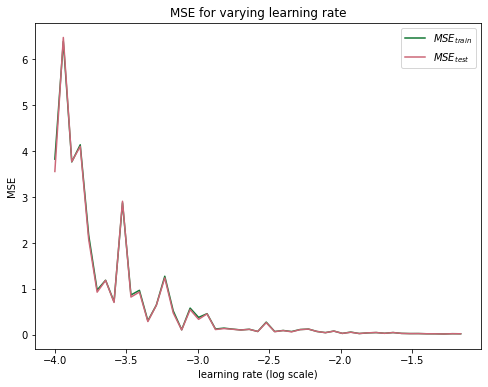

In [467]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6))
plt.plot(np.log10(learning_rates[:-1]),mse_lr[:-1,0], color='#117733', label='$MSE_{train}$')
plt.plot(np.log10(learning_rates[:-1]),mse_lr[:-1,1], color='#CC6677', label='$MSE_{test}$')
plt.xlabel('learning rate (log scale)')
plt.ylabel('MSE')
plt.title('MSE for varying learning rate')
plt.legend()

The error looks to decrease for increasing learning rate, but we see from the print out that the error explodes at a leatrning rate above about 0.07. The increased error for very small learning rate can be explained by the SGD method taking such small steps down the slope it does not reach a minimum. 

We can let the learning rate vary according to a learning schedule by setting $\texttt{decay=True}$ when creating the model.

In [552]:
importlib.reload(lr_gd)
# Learning schedule #
n_epochs = 10
batchsize = int(len(data.z_train)/10)
learning_rate = 0.05

t0 = 5.0
t1 = np.logspace(1.6, 4, 50)

mse_ls = np.zeros((len(t1),2))

print("t1:   mse_train:   mse_test:")
for i in range(len(t1)):
    current_model = lr_gd.LinearRegressionwithGradientDescent(method="sgd",alpha=0,n_epochs=n_epochs,
                                                              batchsize=batchsize,learning_rate=learning_rate,
                                                              decay=True, t0=t0, t1=t1[i])
    train_hat = current_model.fit(data.X_train,data.z_train)
    test_hat = current_model.predict(data.X_test)
    #mse_ls[i,:] = (mse(train_hat,data.z_train),mse(test_hat,data.z_test))
    print(f"%d      %.3f        %.3f" %(t1[i],mse_ls[i,0],mse_ls[i,1]))

t1:   mse_train:   mse_test:
39      269.645        281.059
44      0.397        0.409
49      0.151        0.151
55      0.111        0.107
62      0.155        0.157
69      0.069        0.068
78      0.108        0.102
87      0.155        0.152
98      0.087        0.085
109      0.045        0.043
122      0.053        0.052
137      0.094        0.089
154      0.086        0.084
172      0.179        0.161
193      0.177        0.162
216      0.158        0.152
241      0.261        0.245
270      0.143        0.148
303      0.389        0.350
339      0.321        0.303
379      0.354        0.327
425      0.321        0.325
475      0.499        0.477
532      0.603        0.596
596      1.286        1.238
667      0.342        0.367
747      0.452        0.441
836      0.578        0.567
936      0.557        0.539
1048      0.419        0.400
1173      0.985        0.987
1313      0.937        0.924
1470      1.481        1.501
1645      1.254        1.274
1842      1.432    

In [544]:
np.log10(42)

1.6232492903979006

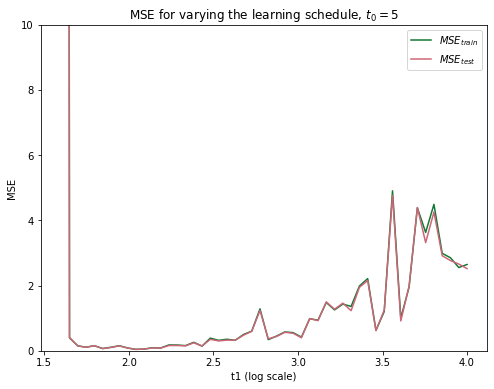

In [554]:
fig = plt.figure(figsize=(8, 6))
plt.plot(np.log10(t1),mse_ls[:,0], color='#117733', label='$MSE_{train}$')
plt.plot(np.log10(t1),mse_ls[:,1], color='#CC6677', label='$MSE_{test}$')
plt.xlabel('t1 (log scale)')
plt.ylabel('MSE')
axes = plt.gca()
axes.set_ylim([0, 10])
plt.title('MSE for varying the learning schedule, $t_0=5$')
plt.legend() 
plt.show()
print("Figure : The mean square error for varying learning schedule.")

We see that a too small value for $\textt{t1}$ leads to the error exploding, but the error also startes rising for large t1. The sweet spot appears to be around $50<\textt{t1}<200$.

In [437]:
# Varying the number of epochs #
learning_rate = 0.05
epochs = np.logspace(0.2, 4.5, 25)
mse_epoch = np.zeros((len(epochs),2))
print("n_epoch:   mse_train:   mse_test:")
for i in range(len(epochs)):
    current_model = lr_gd.LinearRegressionwithGradientDescent(method="sgd",alpha=0,n_epochs=int(epochs[i]),batchsize=batchsize,learning_rate=learning_rate)
    train_hat = current_model.fit(data.X_train,data.z_train)
    test_hat = current_model.predict(data.X_test)
    #mse_epoch[i,:] = (mse(train_hat,data.z_train),mse(test_hat,data.z_test))
    print(f"  %d        %.5f    %.5f" %(epochs[i],mse_epoch[i,0],mse_epoch[i,1]))


n_epoch:   mse_train:   mse_test:
  1        1.06657    1.03089
  2        0.19222    0.18306
  3        0.20743    0.20348
  5        0.10754    0.10622
  8        0.08076    0.08312
  12        0.06147    0.06058
  18        0.03550    0.03472
  28        0.03824    0.03692
  42        0.03629    0.03611
  64        0.03790    0.03652
  98        0.02686    0.02608
  148        0.02978    0.03015
  223        0.02528    0.02514
  338        0.02481    0.02409
  510        0.02011    0.01977
  771        0.02089    0.02073
  1165        0.01876    0.01876
  1761        0.01747    0.01751
  2660        0.01779    0.01789
  4019        0.01588    0.01605
  6072        0.01592    0.01586
  9172        0.01515    0.01513
  13856        0.01421    0.01431
  20933        0.01415    0.01431
  31622        0.01418    0.01437


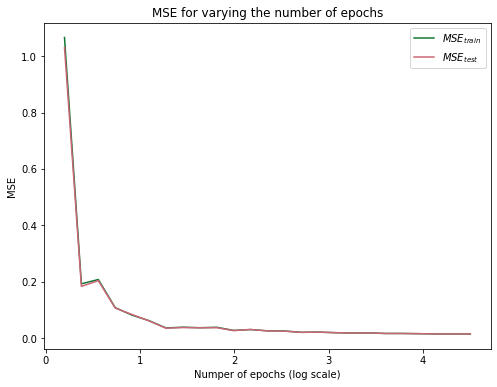

In [438]:
fig = plt.figure(figsize=(8, 6))
plt.plot(np.log10(epochs),mse_epoch[:,0], color='#117733', label='$MSE_{train}$')
plt.plot(np.log10(epochs),mse_epoch[:,1], color='#CC6677', label='$MSE_{test}$')
plt.xlabel('Numper of epochs (log scale)')
plt.ylabel('MSE')
plt.title('MSE for varying the number of epochs')
plt.legend()  

We see that the error decreases as the number of epochs increases, as expected, and flattens out as the number of epochs grows large. using 100+ epochs seems satisfactory, although there is some benefit to increasing it to 1000+ whether that is worth it or not will depend on computation cost and prescicion requirements.

In [427]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Varying the batch size #
learning_rate = 0.05
n_epoch = 100

sizes = np.logspace(0.7, 3.4, 25)
mse_batch = np.zeros((len(sizes),2))

print("batchsize:   mse_train:   mse_test:")
for i in range(len(sizes)):
    current_model = lr_gd.LinearRegressionwithGradientDescent(method="sgd",alpha=0,n_epochs=n_epoch,batchsize=int(sizes[i]),learning_rate=learning_rate)
    train_hat = current_model.fit(data.X_train,data.z_train)
    test_hat = current_model.predict(data.X_test)
    #mse_batch[i,:] = (mse(train_hat,data.z_train),mse(test_hat,data.z_test))
    print(f"   %d         %.5f     %.5f" %(sizes[i],mse_batch[i,0],mse_batch[i,1]))
                                                              


batchsize:   mse_train:   mse_test:
   5         0.36577     0.36662
   6         0.07312     0.07363
   8         0.01570     0.01585
   10         0.01966     0.01998
   14         0.01930     0.01950
   18         0.01827     0.01801
   23         0.01671     0.01707
   30         0.02007     0.02041
   39         0.02043     0.02049
   51         0.02054     0.02101
   66         0.01953     0.01948
   86         0.02010     0.02012
   112         0.02249     0.02253
   145         0.02241     0.02278
   188         0.02569     0.02576
   244         0.01807     0.01790
   316         0.01848     0.01831
   409         0.02361     0.02358
   530         0.02451     0.02485
   687         0.02321     0.02319
   891         0.03336     0.03304
   1154         0.03154     0.03254
   1496         0.03829     0.03757
   1938         0.05182     0.05305
   2511         0.04475     0.04409


In [413]:
np.log10(6)

0.7781512503836436

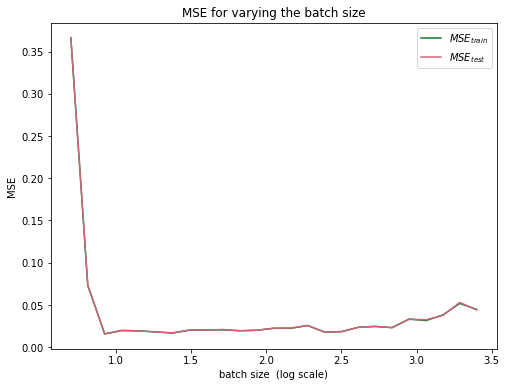

In [428]:
fig = plt.figure(figsize=(8, 6))
plt.plot(np.log10(sizes),mse_batch[:,0], color='#117733', label='$MSE_{train}$')
plt.plot(np.log10(sizes),mse_batch[:,1], color='#CC6677', label='$MSE_{test}$')
plt.xlabel('batch size  (log scale)')
plt.ylabel('MSE')
plt.title('MSE for varying the batch size')
plt.legend() 

As we see the error explodes for small batch size. Let us look at how the error changes with varying (larger) batchsize by excluding the smallest size.

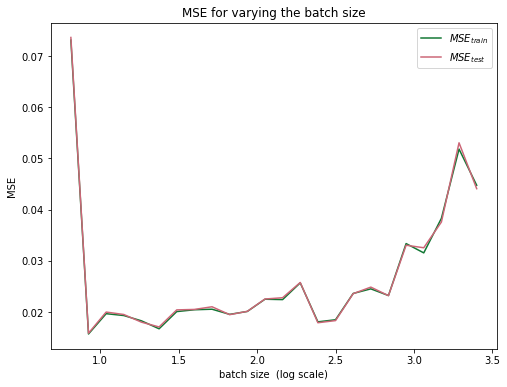

In [429]:
fig = plt.figure(figsize=(8, 6))
plt.plot(np.log10(sizes[1:]),mse_batch[1:,0], color='#117733', label='$MSE_{train}$')
plt.plot(np.log10(sizes[1:]),mse_batch[1:,1], color='#CC6677', label='$MSE_{test}$')

plt.xlabel('batch size  (log scale)')
plt.ylabel('MSE')
plt.title('MSE for varying the batch size')
plt.legend()

For any batchsize > 7, the performance is fairly stable at a minimum. As the batchsize grows very large the error rises again, and a batchsize < 1000 (less than half the test set) is recommended.

Let us move on to look at ridge regression with gradient descent. I will be using k-fold cross validation for this.


In [579]:
importlib.reload(lr_gd)
n_epoch = 100

lambdas = np.logspace(-5, 1, 25)
gammas = np.logspace(-4, -2, 10)
mse_ridge = np.zeros((len(lambdas),len(gammas)))
for i in range(len(lambdas)):
    for j in range(len(gammas)):
        current_model = lr_gd.LinearRegressionwithGradientDescent(method="sgd",alpha=lambdas[i],n_epochs=n_epoch,
                                                                  batchsize=batchsize,learning_rate=gammas[j])
        mse_ridge[i,j], r2_mean = current_model.k_fold_cv(data.X_train,data.z_train,k=5, shuffle=True)

lambda_label = ['lbd=%.1e'%i for i in lambdas]
gamma_label = ['gma=%.1e'%i for i in gammas]
mse_rigde_df = pd.DataFrame(mse_ridge,index=lambda_label,columns=gamma_label)
print("Table 1: MSE for ridge regression with stochastic gradient descent on franke function with noise")
display(mse_rigde_df)

Table 1: MSE for ridge regression with stochastic gradient descent on franke function with noise


,gma=1.0e-04,gma=1.7e-04,gma=2.8e-04,gma=4.6e-04,gma=7.7e-04,gma=1.3e-03,gma=2.2e-03,gma=3.6e-03,gma=6.0e-03,gma=1.0e-02
lbd=1.0e-05,3.725935,2.364426,1.747935,1.005520,0.484093,3.779150e-01,1.288262e-01,8.911351e-02,1.025511e-01,6.759342e-02
lbd=1.8e-05,3.991082,2.717927,1.959196,0.946724,0.744892,3.515901e-01,2.382328e-01,1.048870e-01,7.713890e-02,4.929069e-02
lbd=3.2e-05,2.925118,2.502401,1.503541,0.915243,0.538663,2.942540e-01,1.840742e-01,1.232835e-01,1.157149e-01,6.872037e-02
lbd=5.6e-05,3.757630,2.232690,1.230748,1.549314,0.883988,4.156828e-01,1.668952e-01,1.250718e-01,8.414546e-02,7.325781e-02
lbd=1.0e-04,2.543067,2.096516,2.519703,0.702029,0.712204,3.114047e-01,1.830533e-01,7.503657e-02,8.765904e-02,6.507399e-02
lbd=1.8e-04,2.177148,1.975633,0.994389,0.835862,0.468081,2.818677e-01,1.571501e-01,8.852342e-02,8.858018e-02,5.478548e-02
lbd=3.2e-04,2.490401,2.149087,1.760523,0.782967,1.009630,3.769570e-01,1.584907e-01,9.428089e-02,8.030076e-02,3.475723e-02
lbd=5.6e-04,3.517023,2.293972,1.374792,1.060141,0.680489,2.701840e-01,1.384357e-01,7.958468e-02,8.515914e-02,4.852257e-02
lbd=1.0e-03,4.577722,2.015983,1.775486,1.272424,0.582155,2.988161e-01,2.175703e-01,9.306532e-02,7.778869e-02,1.049033e-01
lbd=1.8e-03,2.406511,3.017388,1.264316,0.708901,0.531646,3.513089e-01,1.622063e-01,9.413502e-02,1.095509e-01,7.700782e-02


We see from table number that for a small enough $\lambda$, the MSE is fairly robust to the choice of the learning rate $\gamma$. As $\lambda$ grows however, the range of $\gamma$-values giving a small MSE narrows. 

Now that we have found some optimal parameters for SGD on this particular problem, let us compare our model performance with that of scikit-learn's $\texttt{SGDRegressor}$.
% SGDRegressor(loss='squared_loss', penalty='l2') and Ridge solve the same optimization problem, via different means.

In [585]:
# Using the same parameters
lmd = 0.0004
lr = 0.02
epochs = 1000

# scikit-learn's SGD regressor
from sklearn.linear_model import SGDRegressor
sklearn_sgd_model = SGDRegressor(loss='squared_loss', penalty='l2', alpha=lmd, fit_intercept=False, max_iter=epochs,
                                 shuffle=True, random_state=93, learning_rate='constant', eta0=lr)
sklearn_sgd_model.fit(data.X_train, data.z_train)
sklearn_sgd_test_pred = sklearn_sgd_model.predict(data.X_test)
print(f"SGDRegressor: mse=%.4f    r2=%0.4f" %(mse(sklearn_sgd_test_pred,data.z_test), 
                                              r2(sklearn_sgd_test_pred,data.z_test)))
# My own linear ridge regression with SGD
sgd_ridge_model = lr_gd.LinearRegressionwithGradientDescent(method="sgd",alpha=lmd,n_epochs=n_epoch,
                                                            batchsize=10,learning_rate=lr)
sgd_train_pred = sgd_ridge_model.fit(data.X_train,data.z_train)
sgd_test_pred = sgd_ridge_model.predict(data.X_test)
print(f"Own ridge SGD: mse=%.4f    r2=%0.4f" %(mse(sgd_test_pred,data.z_test), 
                                              r2(sgd_test_pred,data.z_test)))

SGDRegressor: mse=0.0308    r2=0.6509
Own ridge SGD: mse=0.0164    r2=0.8146


I see the error is actually better for my implementation using these parameter, although the method is noticeably slower. The improved error and at least part of the speed improvement is likely due to $\trxttt[SGDRegressor}$ calculating the gradient on only one datapoint at a time, instead of a batch[3]. This gives a noisier/more erratic movement towards the mean.

### Neural Network - Regression

In [569]:
test = np.arange(1,10)*3
for t in gammas:
    print(t)

0.0001
0.0005623413251903491
0.0031622776601683794
0.01778279410038923
0.1


In [513]:
import importlib

importlib.reload(cd)
importlib.reload(lr_gd)


<module 'LinearRegressionwithGradientDescent' from 'C:\\Users\\emili\\Documents\\Studier\\fys-stk3155\\Exercises\\FYS-STK3155\\Project2\\Code\\LinearRegressionwithGradientDescent.py'>

0.9995996508522816


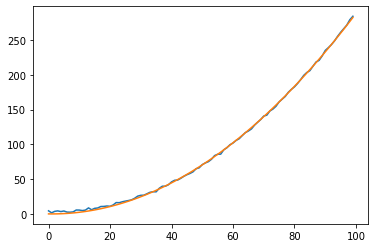

In [558]:
n = 100
x1 = np.linspace(0,10,n)
x2 = x1*x1

X = np.ones((n,2))
x[:,0] = x1
x[:,1] = x2
y_true = 4+3*x[:,1].reshape(n,1)-2*x[:,0].reshape(n,1)+np.random.randn(n,1)


current_model = lr_gd.LinearRegressionwithGradientDescent(method="sgd",alpha=0,n_epochs=10,batchsize=5,learning_rate=0.00001)
train_hat = current_model.fit(x,y_true)
print(r2(train_hat,y_true))

plt.plot(y_true)
plt.plot(train_hat)

In [94]:
import pandas as pd
print(pd.DataFrame(train_hat))
print(data.z_train)

           0         1         2         3         4         5         6    \
0    -2.609361 -2.611288 -2.595916 -2.606210 -2.595661 -2.600698 -2.607179   
1     0.487031  0.484500  0.499086  0.488537  0.498244  0.494249  0.488166   
2    -2.077774 -2.079834 -2.063676 -2.073574 -2.063423 -2.068849 -2.075324   
3    -2.249665 -2.251143 -2.236451 -2.247168 -2.236483 -2.241478 -2.247765   
4    -1.951590 -1.952728 -1.938858 -1.949755 -1.939335 -1.944357 -1.950093   
...        ...       ...       ...       ...       ...       ...       ...   
7495  0.505528  0.503082  0.517385  0.506941  0.516447  0.512371  0.506524   
7496  1.433762  1.425449  1.444931  1.434453  1.442421  1.442308  1.434644   
7497  2.067822  2.058147  2.078579  2.068043  2.075352  2.076250  2.068394   
7498 -2.655767 -2.658011 -2.642123 -2.652026 -2.641711 -2.646856 -2.653392   
7499 -2.375517 -2.380982 -2.362767 -2.371492 -2.362130 -2.365683 -2.372815   

           7         8         9    ...       740       741    

# Conclusion

# Bibliography

[1] Project 1: https://github.com/emiliefj/FYS-STK3155/blob/master/Project1/Report/Project%201%20-%20FYS-STK3155.pdf

[2] Digits dataset in scikit-learn: https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html

[3} https://www.bogotobogo.com/python/scikit-learn/scikit-learn_batch-gradient-descent-versus-stochastic-gradient-descent.php

[4] Universal approximation theorem: https://en.wikipedia.org/wiki/Universal_approximation_theorem

[5] Slides week 40: https://compphysics.github.io/MachineLearning/doc/pub/week40/html/week40.html

[6] Softmax function: https://en.wikipedia.org/wiki/Softmax_function